In [ ]:
import importlib

In [2]:
from oi_bulk_get_fns import get_all_openinsider_chunks,openinsider_url
import pandas as pd

In [ ]:
#IFF need to re-pull from OI:
start = pd.Timestamp('2019-01-01')
end = pd.Timestamp('2025-08-06')
get_all_openinsider_chunks(start,end,chunk_size=1000,window_days=45,overlap_days=0)

In [ ]:
filename = 'oi_rawpull_ymd_2019_01_01_2025_08_06_incl.csv'
oipmega1 = pd.read_csv(filename, usecols=lambda col: col != pd.read_csv(filename, nrows=0).columns[0])

In [11]:
print(oipmega1.head())
print('number of rows:', len(oipmega1))
tickers = oipmega1["ticker"].unique().tolist()
print(oipmega1.columns)

           filing_date  trade_date ticker            company_name  \
0  2025-08-06 21:18:06  2025-08-05    WSC  Willscot Holdings Corp   
1  2025-08-06 20:48:14  2025-08-04   PRLB          Proto Labs Inc   
2  2025-08-06 19:47:30  2025-08-04   RVSB   Riverview Bancorp Inc   
3  2025-08-06 19:21:21  2025-08-04   TBBK           Bancorp, Inc.   
4  2025-08-06 18:43:37  2025-08-06   ASUR      Asure Software Inc   

         insider_name      title    trade_type   qty    owned     value  \
0  Soultz Bradley Lee        CEO  P - Purchase  5000   739418  125750.0   
1      Krishna Suresh  Pres, CEO  P - Purchase  1725    18021   75055.0   
2        Benke Robert   EVP, CCO  P - Purchase  4000    45578   19400.0   
3        Cohn Matthew        Dir  P - Purchase   550   227244   34931.0   
4      Goepel Patrick   COB, CEO  P - Purchase  5250  1307622   42840.0   

   insider_price  d_own_plus%_isnew  d_own_plus%  
0          25.15                  0          1.0  
1          43.51                

In [13]:
def print_top_volume_dates(df, date_col='filing_date', top_n=10):
    # Extract just the date (not time)
    df_dates = df.copy()
    df_dates['date_only'] = pd.to_datetime(df_dates[date_col]).dt.date
    # Group by date and count
    date_counts = df_dates.groupby('date_only').size()
    # Sort in descending order and take top N
    top_dates = date_counts.sort_values(ascending=False).head(top_n)
    # Print
    print(f"Top {top_n} dates by #filings (descending):")
    for d, count in top_dates.items():
        print(f"{d}: {count} filings")
    return top_dates

# Usage:
print_top_volume_dates(oipmega1, top_n=20)



Top 20 dates by #filings (descending):
2020-03-11: 557 filings
2020-03-16: 418 filings
2020-03-13: 408 filings
2020-03-12: 365 filings
2020-03-17: 303 filings
2020-03-10: 284 filings
2019-01-02: 280 filings
2019-03-05: 276 filings
2020-03-18: 269 filings
2023-03-15: 258 filings
2020-03-19: 238 filings
2020-03-09: 231 filings
2019-07-03: 219 filings
2021-08-18: 217 filings
2020-03-20: 214 filings
2022-06-21: 214 filings
2019-06-04: 207 filings
2020-03-05: 203 filings
2019-08-15: 196 filings
2023-05-04: 194 filings


date_only
2020-03-11    557
2020-03-16    418
2020-03-13    408
2020-03-12    365
2020-03-17    303
2020-03-10    284
2019-01-02    280
2019-03-05    276
2020-03-18    269
2023-03-15    258
2020-03-19    238
2020-03-09    231
2019-07-03    219
2021-08-18    217
2020-03-20    214
2022-06-21    214
2019-06-04    207
2020-03-05    203
2019-08-15    196
2023-05-04    194
dtype: int64

In [15]:
#YF PRICE/vol DATA ATTEMPT 1
from add_relative_prices2 import add_prices_to_oip_precise
window = [1,2,3,4,5,6,7,8,9,10,15,20,35,60,90,130,180,245]
oip_w_prices, error_dict = add_prices_to_oip_precise(oipmega1, fwindow=window, bwindow=window)
with pd.option_context('display.max_columns', None):
    #print(df.head())
    print(oip_w_prices.head(3))

1 Failed download:
['BCAR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-23 00:00:00 -> 2026-12-18 00:00:00)')
1 Failed download:
['APAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-18 00:00:00 -> 2026-12-13 00:00:00)')
1 Failed download:
['NMP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-02-18 00:00:00 -> 2026-11-22 00:00:00)')
1 Failed download:
['NRX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-12-10 00:00:00 -> 2026-11-15 00:00:00)')

1 Failed download:
['FIGX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PPTIN']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['VREO']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['PTN']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['SWPR']: YFTzMissingError('possibly delisted; no timezone found')
1 Fail

  filing_date  trade_date ticker            company_name        insider_name  \
0  2025-08-06  2025-08-05    WSC  Willscot Holdings Corp  Soultz Bradley Lee   
1  2025-08-06  2025-08-04   PRLB          Proto Labs Inc      Krishna Suresh   
2  2025-08-06  2025-08-04   RVSB   Riverview Bancorp Inc        Benke Robert   

       title    trade_type   qty   owned     value  insider_price  \
0        CEO  P - Purchase  5000  739418  125750.0          25.15   
1  Pres, CEO  P - Purchase  1725   18021   75055.0          43.51   
2   EVP, CCO  P - Purchase  4000   45578   19400.0           4.85   

   d_own_plus%_isnew  d_own_plus% mebuydate p_p1_td v_p1_td p_p2_td v_p2_td  \
0                  0          1.0       NaT    None    None    None    None   
1                  0         11.0       NaT    None    None    None    None   
2                  0         10.0       NaT    None    None    None    None   

  p_p3_td v_p3_td p_p4_td v_p4_td p_p5_td v_p5_td p_p6_td v_p6_td p_p7_td  \
0    Non

In [16]:
#save first price/vol pull checkpoint
oip_w_prices.to_csv('oipmega_post_yf1.csv',index=False)

In [20]:
#SEPARATE TRAIN/TEST/VALIDATION (all are inclusive) - these refer to filing_Dates !!!
#train: 1/1/2019 - 4/1/2025 oip1
#test: 4/2/2025 - 7/6/2025 oip2
#validation: simulate portfolio from then on? oip3
oip_w_prices['filing_date'] = pd.to_datetime(oipmega1['filing_date'])

# Define date boundaries
train_start = pd.Timestamp('2019-01-01')
train_end   = pd.Timestamp('2025-04-01')  # inclusive
test_start  = pd.Timestamp('2025-04-02')
test_end    = pd.Timestamp('2025-07-06')  # inclusive

# Create splits
oip1 = oip_w_prices[
    (oip_w_prices['filing_date'] >= train_start) &
    (oip_w_prices['filing_date'] <= train_end)
]

oip2 = oip_w_prices[
    (oip_w_prices['filing_date'] >= test_start) &
    (oip_w_prices['filing_date'] <= test_end)
]

print(f"Train rows: {len(oip1)}")
print(f"Test rows: {len(oip2)}")

Train rows: 89524
Test rows: 3015


In [ ]:
import csv

def write_error_dict_to_csv(error_dict, filename='error_report.csv'):
    # Open CSV file for writing
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['ticker', 'row_index', 'error_type', 'error_message']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        # Loop over the error dict
        for ticker, ticker_errors in error_dict.items():
            if isinstance(ticker_errors, dict):
                for row_idx, errors in ticker_errors.items():
                    # If errors is a dict of field:message
                    if isinstance(errors, dict):
                        for error_type, error_msg in errors.items():
                            writer.writerow({
                                'ticker': ticker,
                                'row_index': row_idx,
                                'error_type': error_type,
                                'error_message': error_msg
                            })
                    else:
                        # In case errors is just a single message
                        writer.writerow({
                            'ticker': ticker,
                            'row_index': row_idx,
                            'error_type': 'error',
                            'error_message': errors
                        })
            else:
                # If ticker_errors is just a string or not a dict
                writer.writerow({
                    'ticker': ticker,
                    'row_index': '',
                    'error_type': 'error',
                    'error_message': ticker_errors
                })

# Usage:
write_error_dict_to_csv(error_dict, filename='d3_yf_errors_full_flat.csv')


In [ ]:
import csv

def write_first_error_per_ticker(error_dict, df, filename='error_first_per_ticker.csv'):
    # Open CSV file for writing
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['ticker', 'company_name', 'row_index', 'filing_date', 'trade_date', 'insider_price','error_type', 'error_message']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for ticker, ticker_errors in error_dict.items():
            if isinstance(ticker_errors, dict) and len(ticker_errors) > 0:
                # Get the first row index (sorted)
                first_idx = sorted(ticker_errors.keys())[0]
                errors = ticker_errors[first_idx]
                # Get company name, filing_date, trade_date from the DataFrame for that ticker and index
                try:
                    row = df.loc[first_idx]
                    company_name = row.get('company_name', '')
                    filing_date = row.get('filing_date', '')
                    trade_date = row.get('trade_date', '')
                    insider_price = row.get('insider_price','')
                except Exception:
                    # fallback: try to get any row for the ticker
                    row = df[df['ticker'] == ticker].iloc[0]
                    company_name = row.get('company_name', '')
                    filing_date = row.get('filing_date', '')
                    trade_date = row.get('trade_date', '')
                    insider_price = row.get('insider_price','')
                # For all error types in this first error, print each as a column
                if isinstance(errors, dict):
                    # Get the first error only (if multiple)
                    error_type, error_msg = list(errors.items())[0]
                else:
                    error_type, error_msg = 'error', errors
                writer.writerow({
                    'ticker': ticker,
                    'company_name': company_name,
                    'row_index': first_idx,
                    'filing_date': filing_date,
                    'trade_date': trade_date,
                    'insider_price': insider_price,
                    'error_type': error_type,
                    'error_message': error_msg
                })
            else:
                # ticker_errors is just a string or empty
                writer.writerow({
                    'ticker': ticker,
                    'company_name': '',
                    'row_index': '',
                    'filing_date': '',
                    'trade_date': '',
                    'insider_price': '',
                    'error_type': 'error',
                    'error_message': ticker_errors
                })
import pandas as pd
from collections import defaultdict

# REBUILD ERROR DICT FROM FILE
error_df = pd.read_csv('d3_yf_errors_full_flat.csv')
# Build nested dict
error_dict = defaultdict(dict)
for _, row in error_df.iterrows():
    ticker = row['ticker']
    row_index = int(row['row_index'])
    error_type = row['error_type']
    error_message = row['error_message']
    if row_index not in error_dict[ticker]:
        error_dict[ticker][row_index] = {}
    error_dict[ticker][row_index][error_type] = error_message

# Optionally, convert defaultdict to regular dict (for pickling, safety, etc)
error_dict = {k: dict(v) for k, v in error_dict.items()}

#read in from csv so i dont need to keep live in df from prevs
#error_dict = pd.read_csv('d3_yf_errors_full_flat.csv')
oip_w_prices = pd.read_csv('oipmega_post_yf1.csv')
write_first_error_per_ticker(error_dict, oip_w_prices, filename='d3_yf_errors_by_ticker_wdata2.csv')
#FILTER:
#in excel by: error_type - only filing_price, and at the same time: filing_date NOT 2025 (those j dont have lookfwds beyond august duh)
#reduces down to ~2000 missing... womp womp


In [ ]:
#1) export error_dict as failed tickers dict to xl for manual check?
#2) manual url retrieval? or llm based agent search to get correct investing.com urls
#3) run script to get all investing.com data for all missing (from yahoofinance) (but valid) stocks
    #or from barchart - chart ripper
        #or other custom ripper site
#4) run script to pull from those many downloaded csvs to a df
#5) run an EQUIVALENT BUT MODIFIED add_prices_to_oip_precise for these new data, 
    #5b) merge this df with the main stock df

#6) run filtering algo(s) - zero vol, zero price, ADDV, min vol, min $ flow etc
#7) run some viz to look at included vs excluded stocks
#7.5) add returns computation
#7.6) add trade-to-file or trade-to-mebuy delay to df (feature)
#7.7) add trade-to-mebuy price change to df (feature)

#8) fit model - RF? some other time-series vecto autoreg? dynamic hold dur pred? return trade +%^ confidence? <-useful?
    #8a) tune model? ver vs val/train-test loss viz?
    #8b) R^2, F1, recall/precision metric sorting
    #8c) model selection
#9) pull out-of-training set OI data
    #9b) format like training data dfs
#10) pass into model, predict returns

#11) simulate trading strategy
    #skip negative predicted returns (duh)
    #skip small pos pred returns? ie threshold if pred to return less than 1% over the pred ideal hold duration
    #incl ADDV restriction - ie: give maximum trade size - cant go over say 1% (or .5%) of avg daily $ vol
    #dynamic buy based on +^% confidence (if part of model)
    #add buy/hold checkins to RF/conditional model - 
        #if after 1 day of hold it goes down x%, how likely to still finish in the green?

In [3]:
oip_w_prices = pd.read_csv('oipmega_post_yf1.csv')

In [16]:
import yfinance as yf

ticker='FIGAC'
hist = yf.download(ticker, start='2025-06-01', end='2025-08-05', progress=False,auto_adjust=True)['Low']
print(hist)

HTTP Error 404: 

1 Failed download:
['FIGAC']: YFTzMissingError('possibly delisted; no timezone found')


Empty DataFrame
Columns: [FIGAC]
Index: []


<Figure size 1500x500 with 0 Axes>

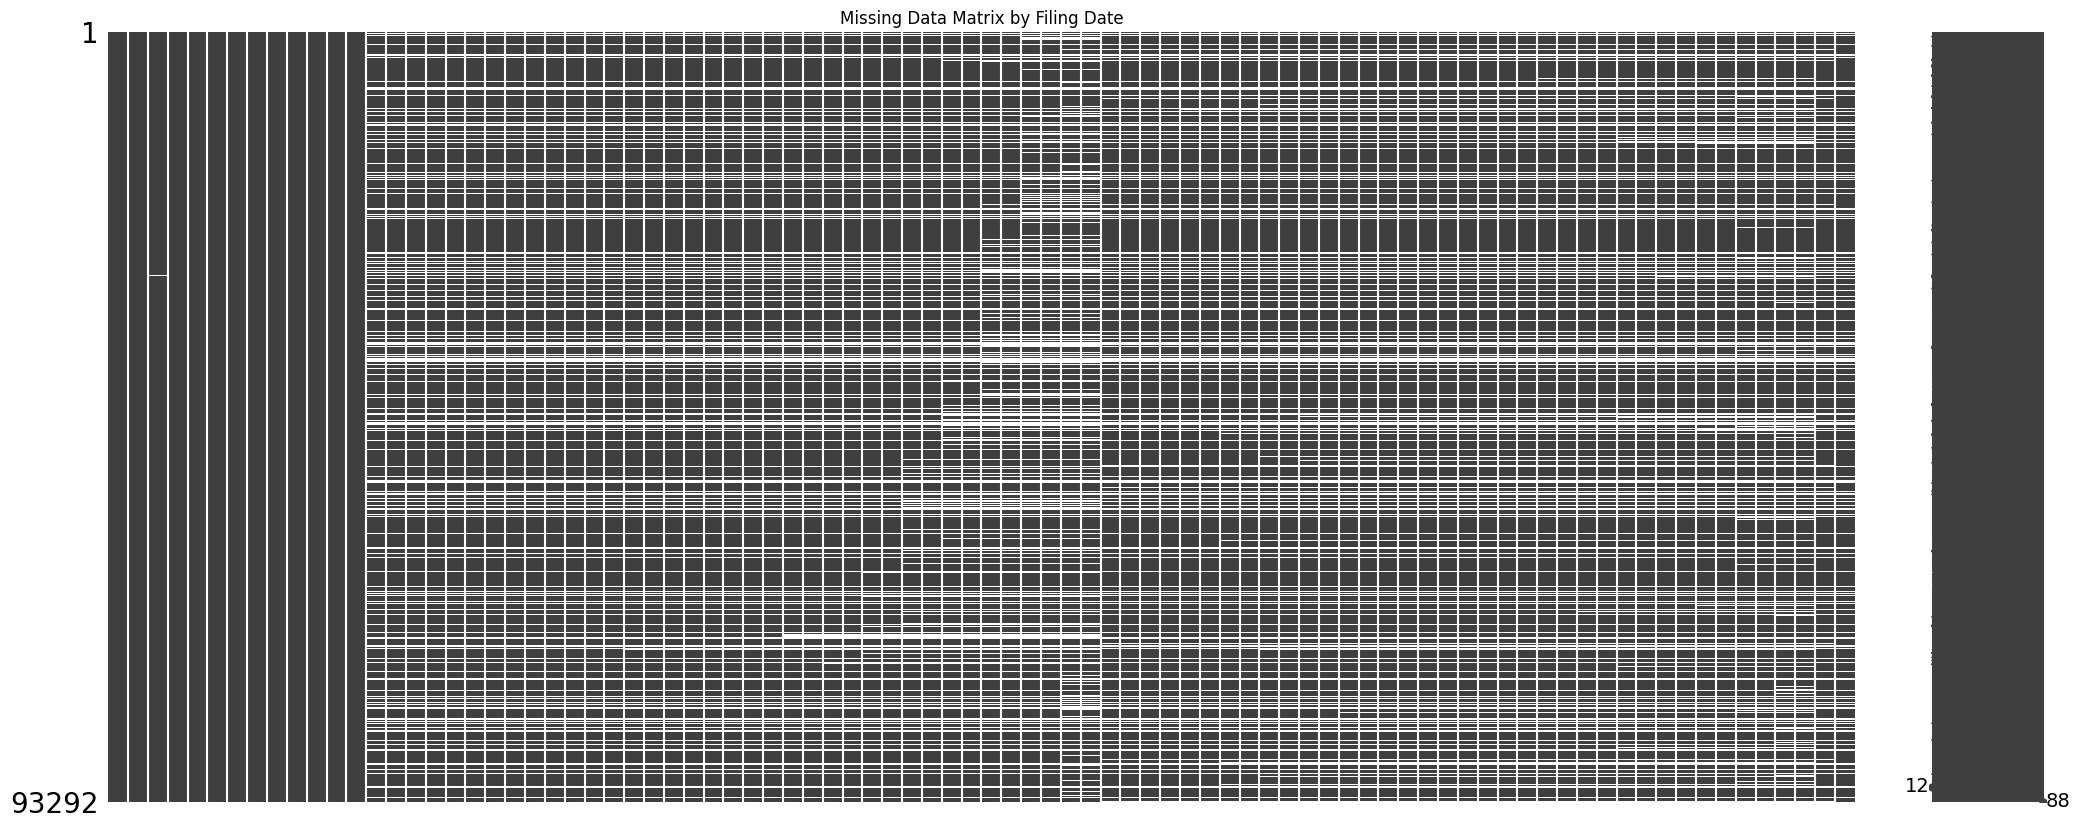

<Figure size 1200x800 with 0 Axes>

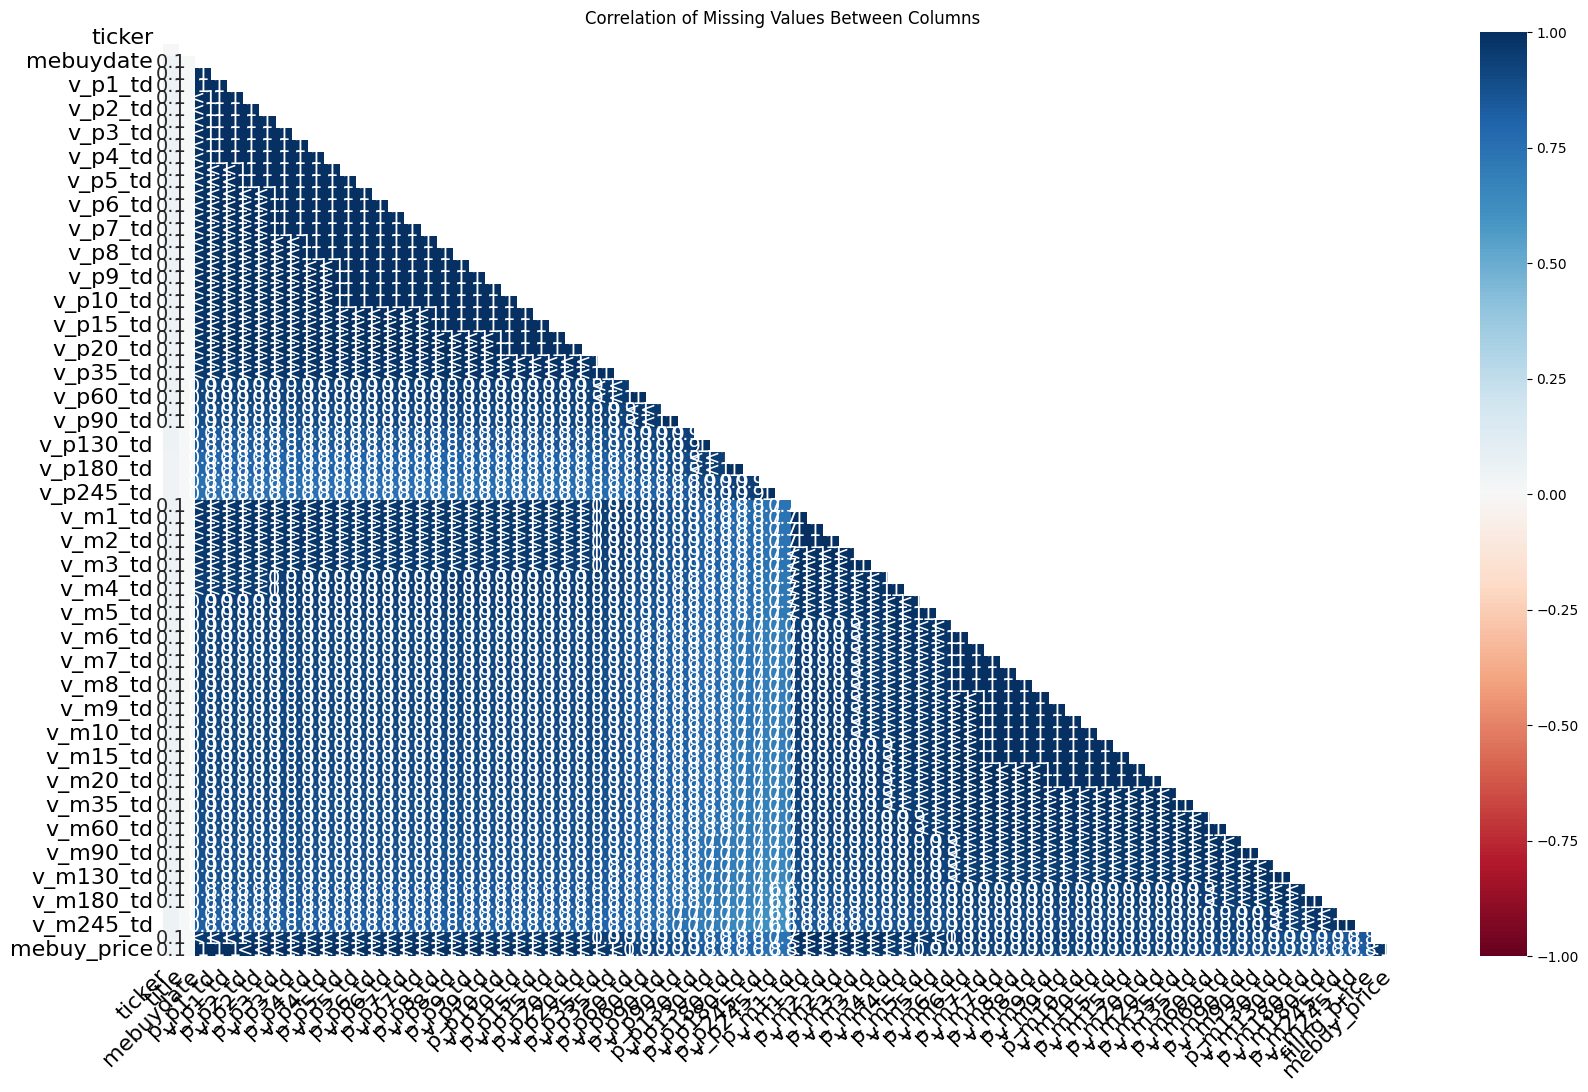

C:\Users\John DeForest\AppData\Local\Temp\ipykernel_64576\3625259196.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="viridis")


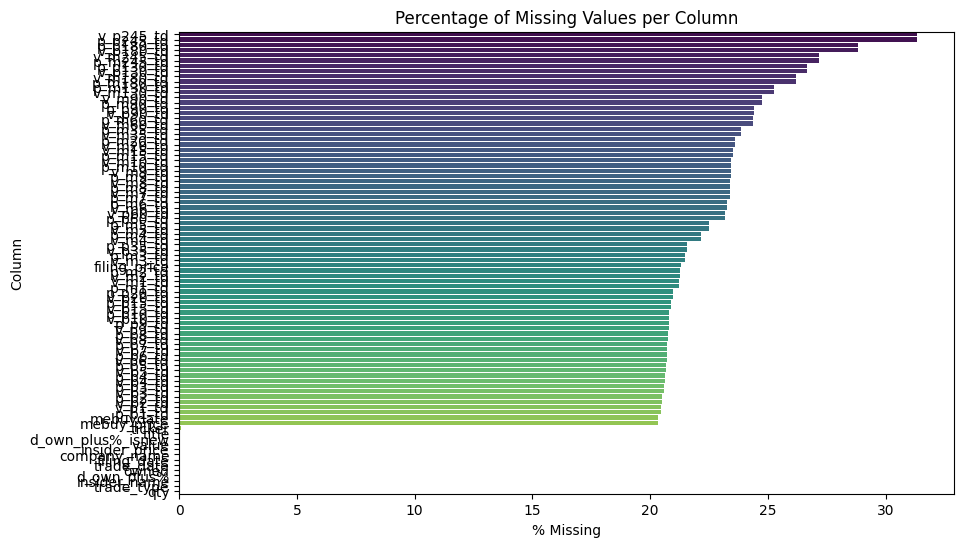

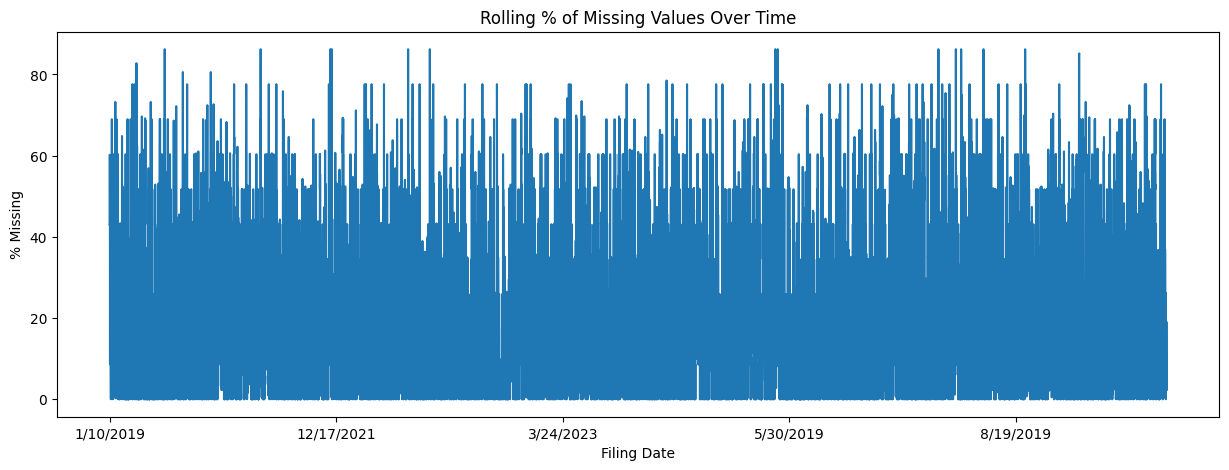

<Figure size 1500x500 with 0 Axes>

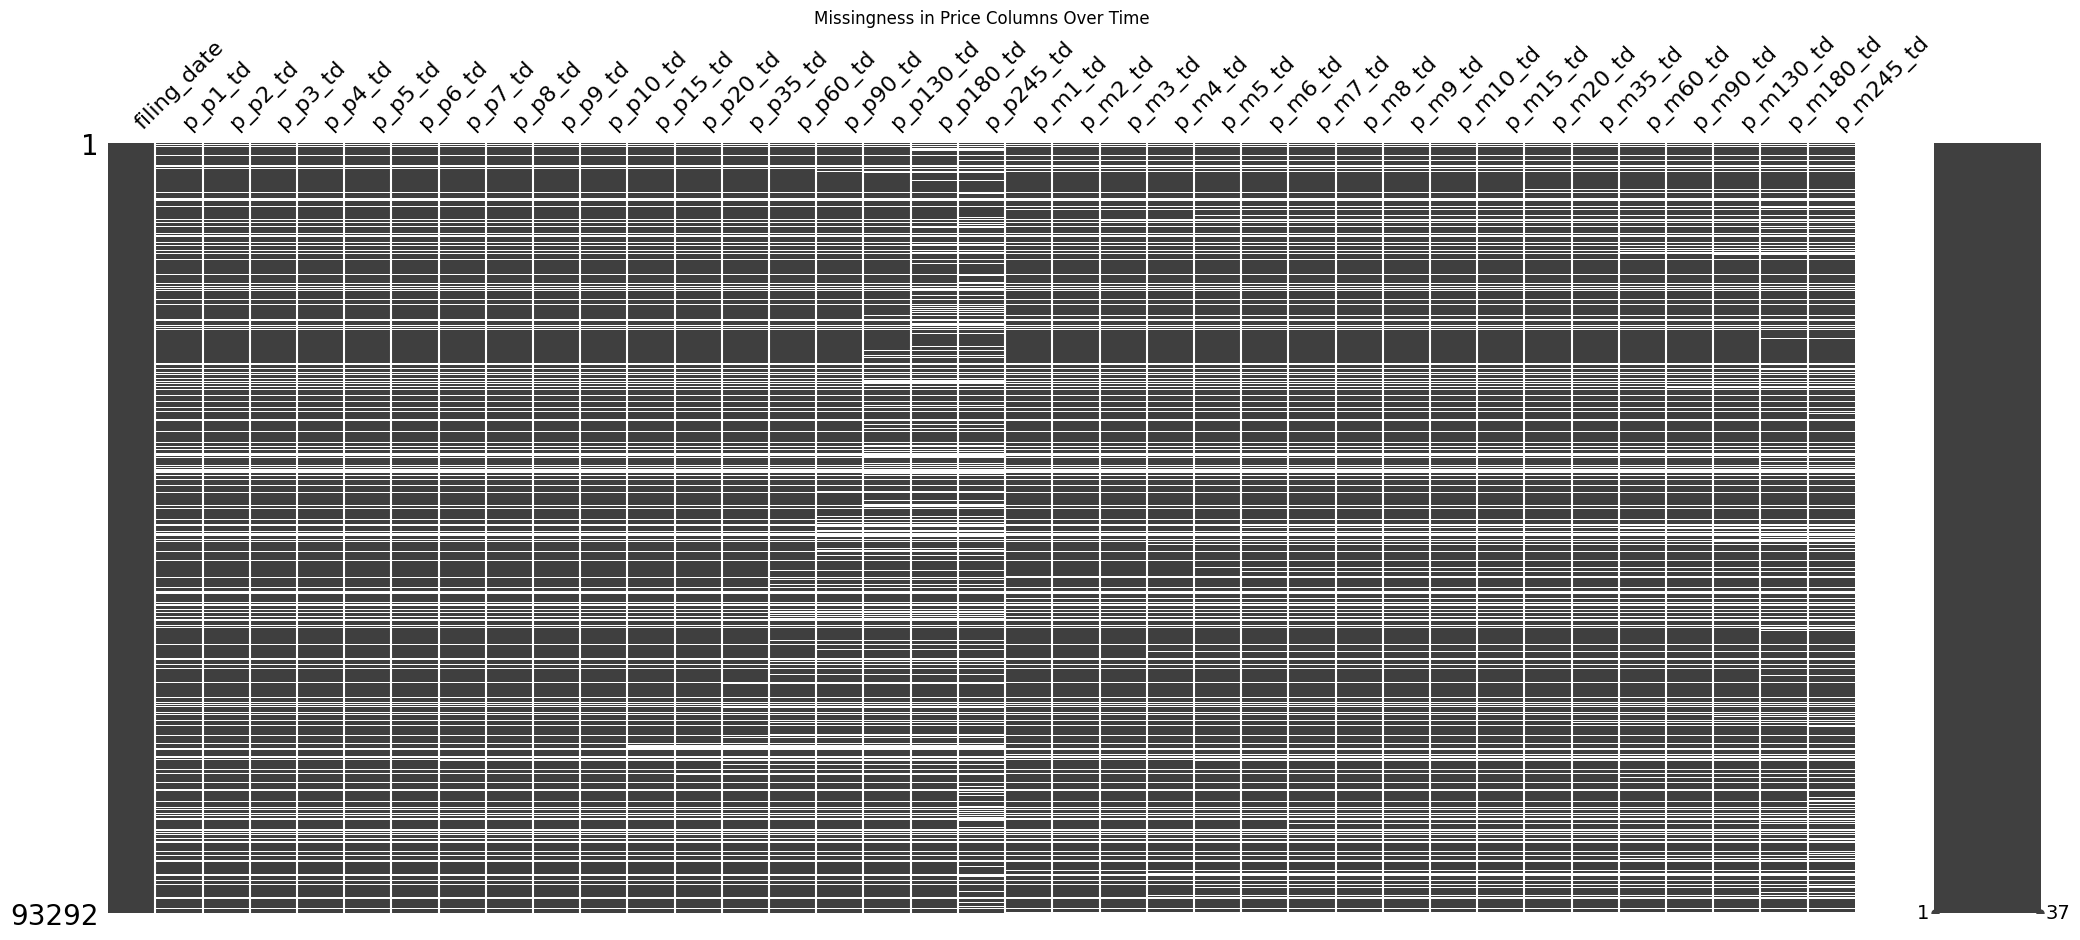

<Figure size 1500x500 with 0 Axes>

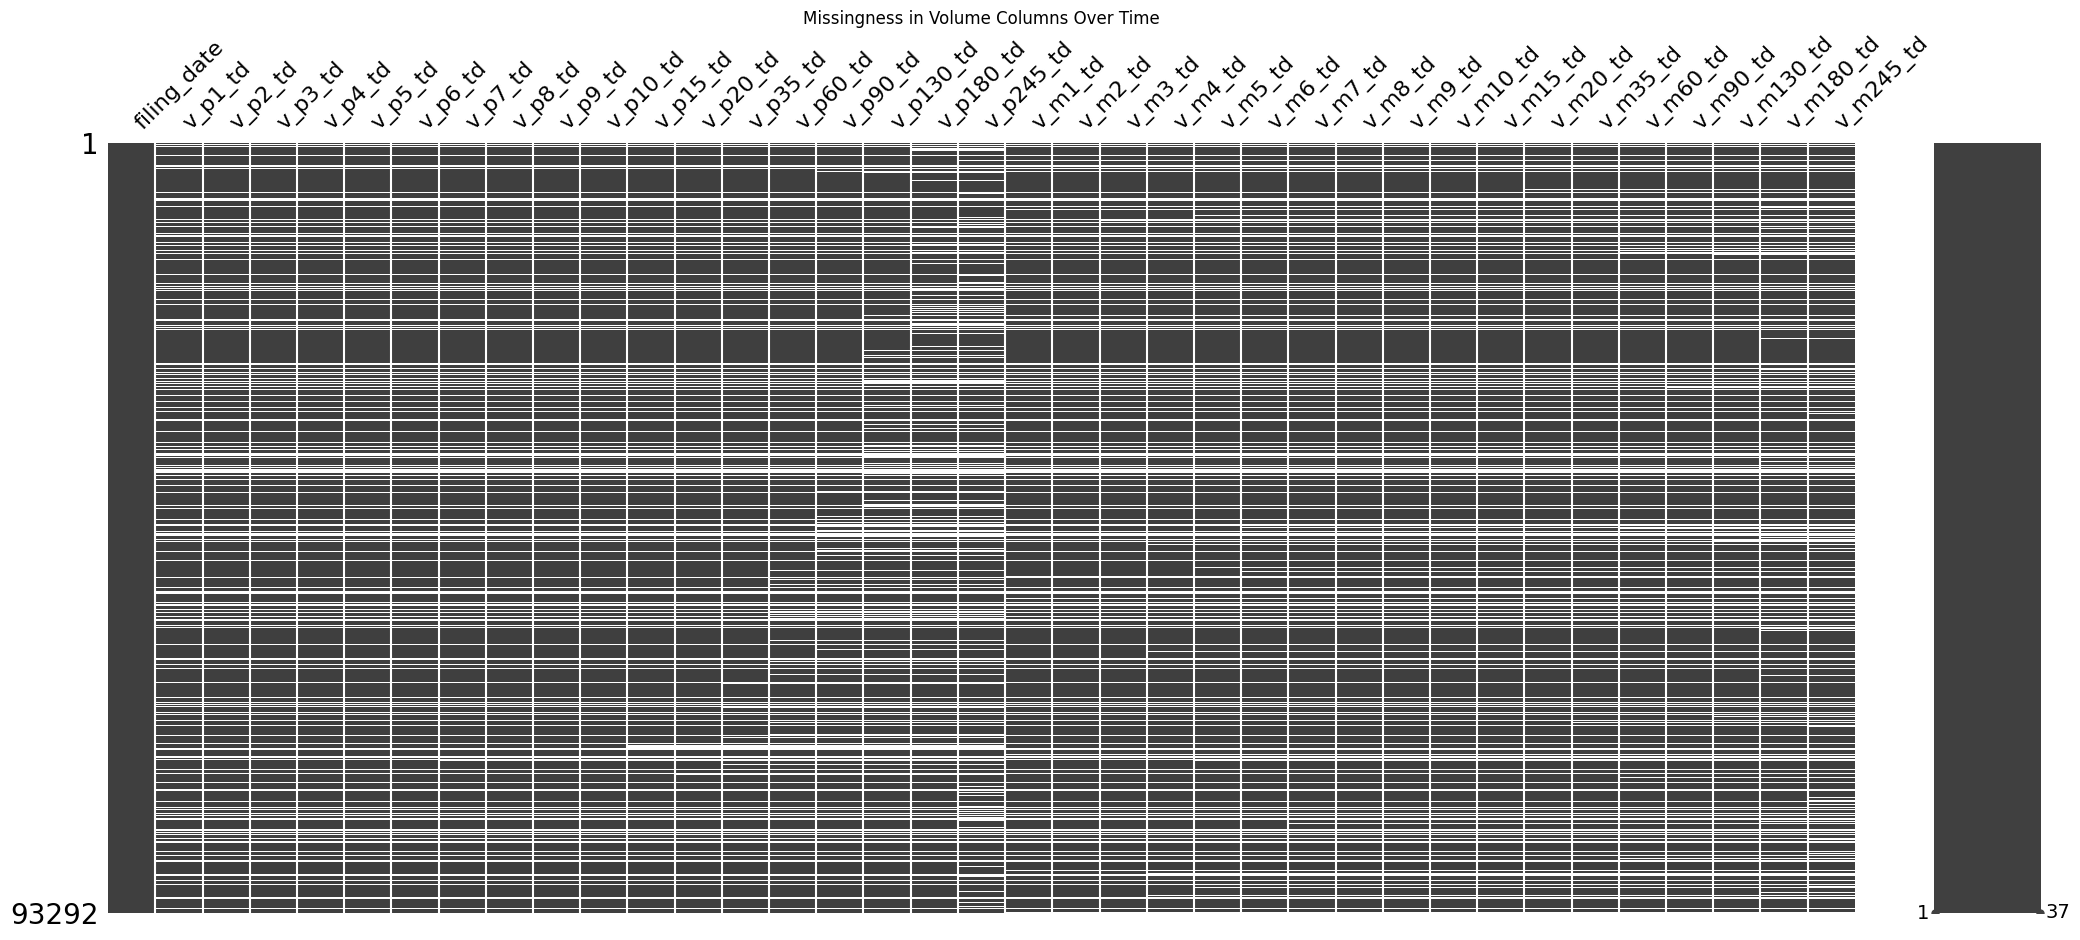

In [ ]:
# Missing Data Visualization for Insider Trading Backtest Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load your CSV
# Replace 'your_file.csv' with your actual CSV file path
#df = pd.read_csv("your_file.csv", parse_dates=["filing_date"], infer_datetime_format=True)
df= oip_w_prices
# Sort by filing date (important for time-based plotting)
df = df.sort_values("filing_date")

# --- 4. Missing values over time ---
# We'll plot the percentage of missing values per filing date
missing_over_time = df.set_index("filing_date").isna().mean(axis=1) * 100
plt.figure(figsize=(15, 5))
missing_over_time.rolling(window=10).mean().plot()
plt.title("Rolling % of Missing Values Over Time")
plt.ylabel("% Missing")
plt.xlabel("Filing Date")
plt.show()



C:\Users\John DeForest\AppData\Local\Temp\ipykernel_64576\3390665563.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().mean().mean() * 100)


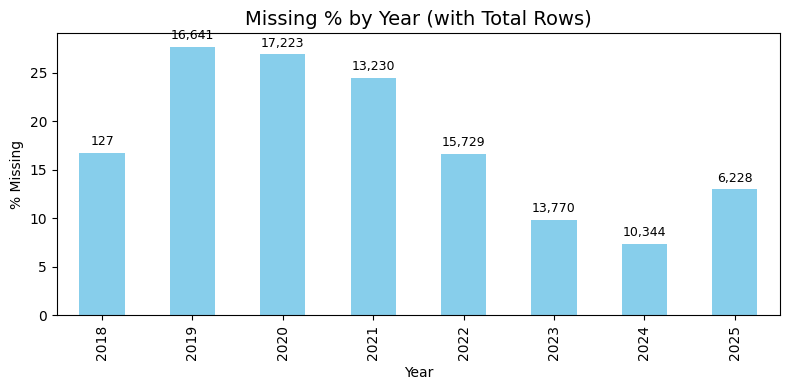

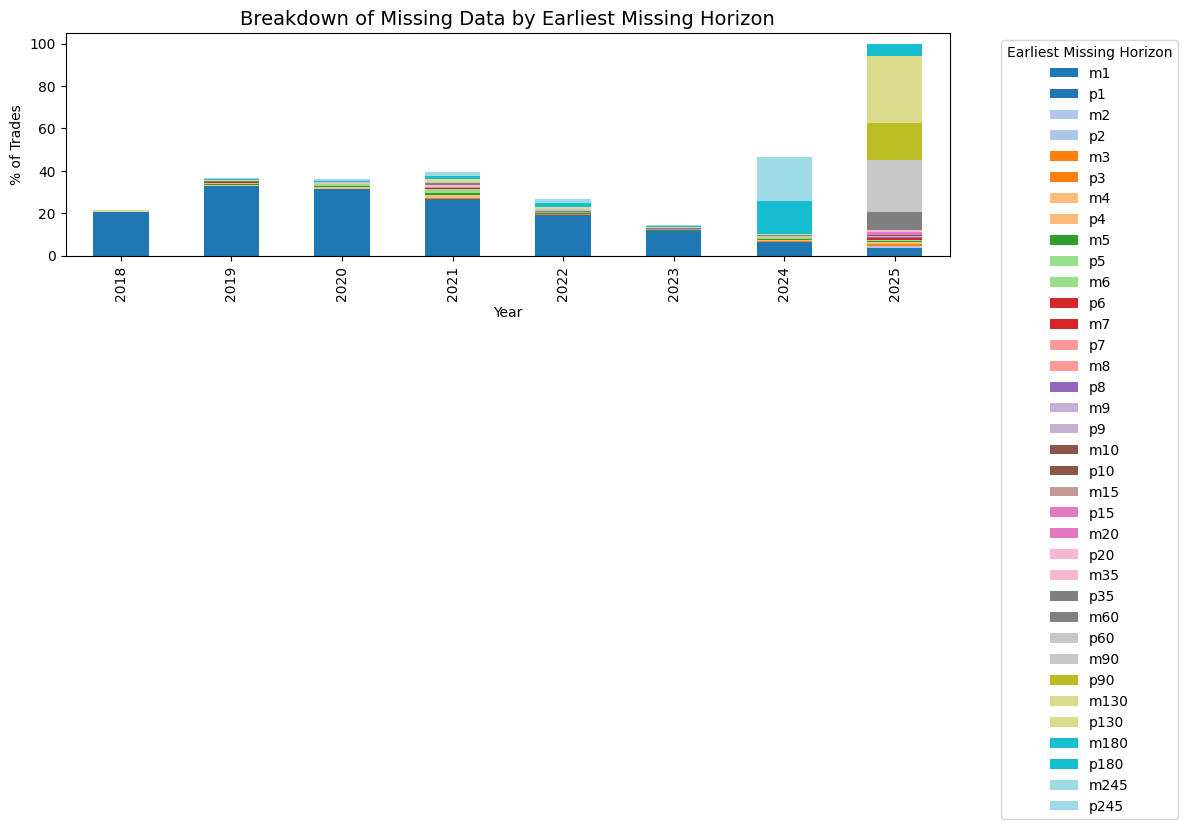

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= LOAD DATA & PARSE DATE =========
df = oip_w_prices#pd.read_csv("your_file.csv", low_memory=False)

# Parse filing_date handling m/d/yyyy or mm/dd/yyyy (mixed)
# First try strict US month-first format
try:
    df["filing_date"] = pd.to_datetime(df["filing_date"], format="%m/%d/%Y", errors="raise")
except:
    df["filing_date"] = pd.to_datetime(df["filing_date"], errors="coerce", infer_datetime_format=True)

# ========= ROUND PRICE & VOLUME =========
price_cols = [c for c in df.columns if c.startswith("p_")]
volume_cols = [c for c in df.columns if c.startswith("v_")]

# Round prices to 3 decimals
df[price_cols] = df[price_cols].apply(lambda x: np.round(x, 3))

# Round volumes to whole numbers (integers)
df[volume_cols] = df[volume_cols].apply(lambda x: np.round(x, 0).astype("Int64"))

# ========= DOWNSIZE MEMORY =========
for col in df.select_dtypes(include=["float64"]).columns:
    df[col] = pd.to_numeric(df[col], downcast="float")
for col in df.select_dtypes(include=["int64"]).columns:
    df[col] = pd.to_numeric(df[col], downcast="integer")

# ========= 3. MISSINGNESS BY YEAR (with counts) =========
df["year"] = df["filing_date"].dt.year

# Missing % per year
miss_by_year = (
    df.groupby("year")
      .apply(lambda x: x.isna().mean().mean() * 100)
)

# Row counts per year
count_by_year = df.groupby("year").size()

# Plot missing % by year
fig, ax = plt.subplots(figsize=(8, 4))
bars = miss_by_year.plot(kind="bar", ax=ax, color="skyblue")

# Add data labels (row counts) above each bar
for i, (year, pct) in enumerate(miss_by_year.items()):
    total_rows = count_by_year.get(year, 0)
    ax.text(
        i, pct + 0.5,           # Position slightly above bar
        f"{total_rows:,}",      # Format with commas
        ha="center", va="bottom", fontsize=9, rotation=0
    )

plt.title("Missing % by Year (with Total Rows)", fontsize=14)
plt.ylabel("% Missing")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# ========= 3B. Missingness by Year: Earliest Horizon Category =========

# Define horizons in order (nearest to farthest from filing_date)
# Adjust list based on your dataset's actual column names
horizon_order = [
    "m1", "p1",
    "m2", "p2",
    "m3", "p3",
    "m4", "p4",
    "m5", "p5",
    "m6", "p6",
    "m7", "p7",
    "m8", "p8",
    "m9", "p9",
    "m10", "p10",
    "m15", "p15",
    "m20", "p20",
    "m35", "p35",
    "m60", "p60",
    "m90", "p90",
    "m130", "p130",
    "m180", "p180",
    "m245", "p245"
]

# Identify all p_ and v_ columns
p_cols = [c for c in df.columns if c.startswith("p_")]
v_cols = [c for c in df.columns if c.startswith("v_")]

# Map horizon -> matching columns (both price and volume)
horizon_to_cols = {
    h: [c for c in p_cols + v_cols if f"_{h}_" in c] for h in horizon_order
}

# Function to find earliest missing horizon for a row
def earliest_missing_horizon(row):
    for h in horizon_order:
        cols = horizon_to_cols[h]
        if any(pd.isna(row[col]) for col in cols if col in row):
            return h
    return "None"  # if no missing horizons

# Apply to dataset (low memory: process in chunks if needed)
df["missing_category"] = df.apply(earliest_missing_horizon, axis=1)

# Group by year & category
year_cat_counts = df.groupby(["year", "missing_category"]).size().reset_index(name="count")

# Pivot for stacked bar
year_cat_pivot = year_cat_counts.pivot(index="year", columns="missing_category", values="count").fillna(0)

# Normalize to % for stacked proportion
year_cat_percent = year_cat_pivot.div(year_cat_pivot.sum(axis=1), axis=0) * 100

# Plot stacked bar
fig, ax = plt.subplots(figsize=(12, 6))
year_cat_percent[ [h for h in horizon_order if h in year_cat_percent.columns] ].plot(
    kind="bar", stacked=True, ax=ax, cmap="tab20"
)

plt.title("Breakdown of Missing Data by Earliest Missing Horizon", fontsize=14)
plt.ylabel("% of Trades")
plt.xlabel("Year")
plt.legend(title="Earliest Missing Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



# ========= 5. SAVE CLEANED VERSION =========
df.to_csv("oip_mega_rounded1.csv", index=False)
print("Cleaned & rounded dataset saved to 'your_file_cleaned.csv'")


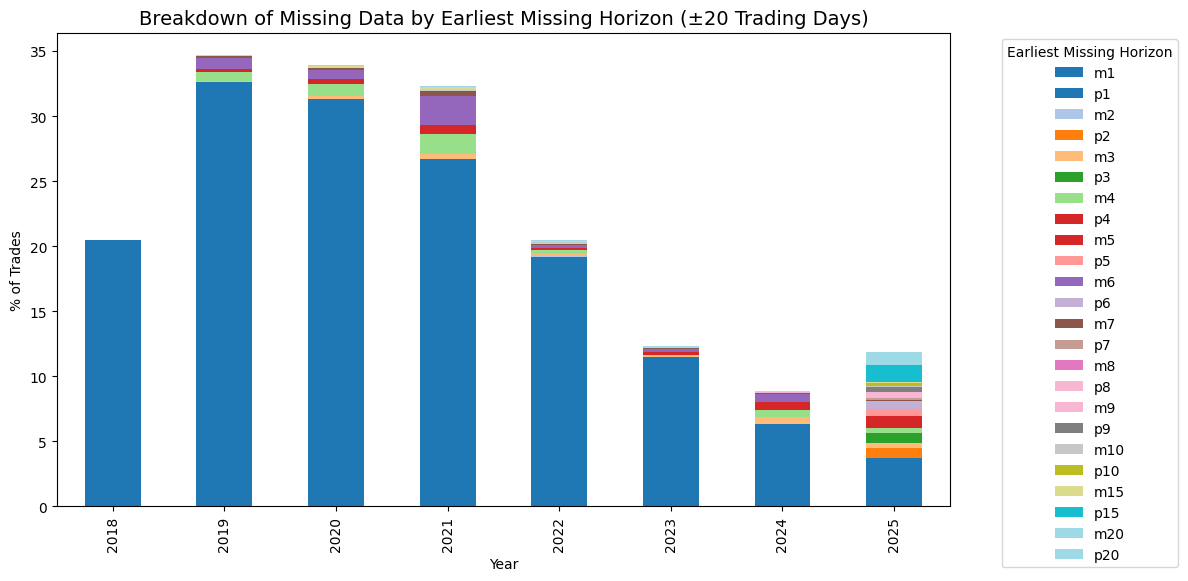

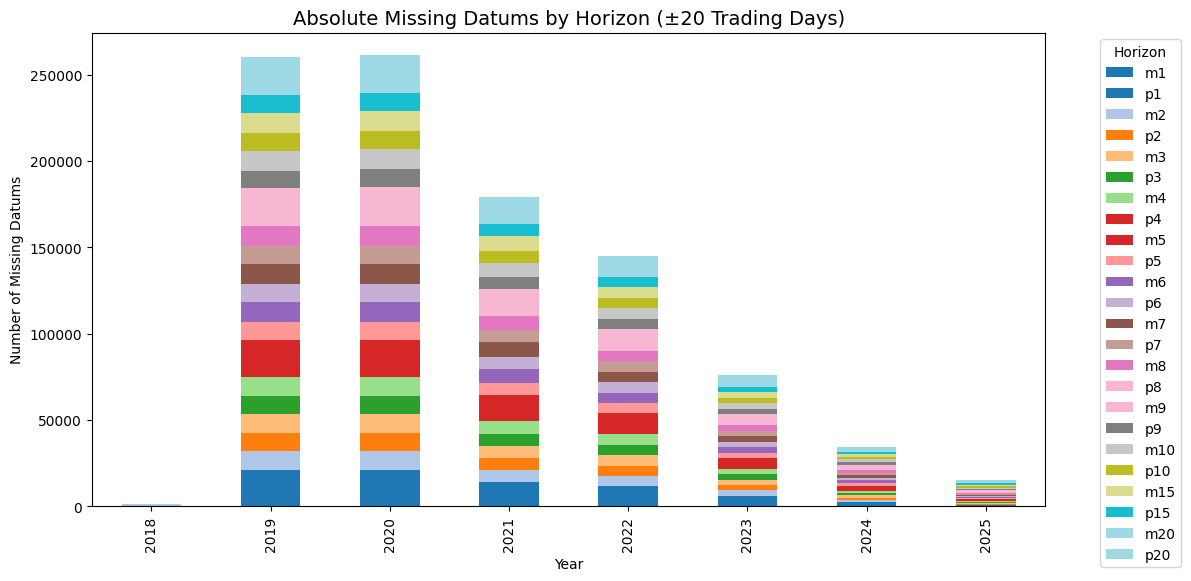

In [12]:
# ========= 3C. Missingness by Year (±20 Trading Days) =========

# Horizons to consider (up to 20 td in both directions)
horizon_order_20 = [
    "m1", "p1",
    "m2", "p2",
    "m3", "p3",
    "m4", "p4",
    "m5", "p5",
    "m6", "p6",
    "m7", "p7",
    "m8", "p8",
    "m9", "p9",
    "m10", "p10",
    "m15", "p15",
    "m20", "p20"
]

# Identify columns
p_cols = [c for c in df.columns if c.startswith("p_")]
v_cols = [c for c in df.columns if c.startswith("v_")]

# Map horizons to cols (both p_ and v_)
horizon_to_cols_20 = {
    h: [c for c in p_cols + v_cols if f"_{h}_" in c] for h in horizon_order_20
}

# Function: earliest missing horizon (±20 td only)
def earliest_missing_horizon_20(row):
    for h in horizon_order_20:
        cols = horizon_to_cols_20[h]
        if any(pd.isna(row[col]) for col in cols if col in row):
            return h
    return "None"

# Assign category
df["missing_category_20"] = df.apply(earliest_missing_horizon_20, axis=1)

# ==== 1. % Breakdown by Year ====
year_cat_counts_20 = df.groupby(["year", "missing_category_20"]).size().reset_index(name="count")
year_cat_pivot_20 = year_cat_counts_20.pivot(index="year", columns="missing_category_20", values="count").fillna(0)
year_cat_percent_20 = year_cat_pivot_20.div(year_cat_pivot_20.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))
year_cat_percent_20[[h for h in horizon_order_20 if h in year_cat_percent_20.columns]].plot(
    kind="bar", stacked=True, ax=ax, cmap="tab20"
)
plt.title("Breakdown of Missing Data by Earliest Missing Horizon (±20 Trading Days)", fontsize=14)
plt.ylabel("% of Trades")
plt.xlabel("Year")
plt.legend(title="Earliest Missing Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ==== 2. Absolute Missing Datums by Year ====
# Count total missing cells (datums) in these horizons, grouped by year & horizon
missing_datum_counts = (
    df.groupby("year")[[col for h in horizon_order_20 for col in horizon_to_cols_20[h]]]
    .apply(lambda x: x.isna().sum())
)

# Convert to long format for plotting
missing_datum_long = missing_datum_counts.reset_index().melt(id_vars="year", var_name="column", value_name="missing_count")

# Map each column to its horizon (m/p)
missing_datum_long["horizon"] = missing_datum_long["column"].apply(
    lambda c: next((h for h in horizon_order_20 if f"_{h}_" in c), None)
)

# Group by year & horizon
datum_by_year_horizon = missing_datum_long.groupby(["year", "horizon"])["missing_count"].sum().reset_index()

# Pivot for stacked bar
datum_pivot = datum_by_year_horizon.pivot(index="year", columns="horizon", values="missing_count").fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
datum_pivot[[h for h in horizon_order_20 if h in datum_pivot.columns]].plot(
    kind="bar", stacked=True, ax=ax, cmap="tab20"
)
plt.title("Absolute Missing Datums by Horizon (±20 Trading Days)", fontsize=14)
plt.ylabel("Number of Missing Datums")
plt.xlabel("Year")
plt.legend(title="Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

# === 1. Load cleaned data ===
df = pd.read_csv("oip_mega_rounded1.csv")

# Ensure dates are parsed
df["trade_date"] = pd.to_datetime(df["trade_date"], errors="coerce")
df["filing_date"] = pd.to_datetime(df["filing_date"], errors="coerce")

# Ensure mebuy_price exists and is numeric
df["mebuy_price"] = pd.to_numeric(df["mebuy_price"], errors="coerce")

# === 2. Add trade2file column (days between trade_date and filing_date) ===
df["trade2file"] = (df["filing_date"] - df["trade_date"]).dt.days

# === 3. Find all price columns ===
price_cols = [c for c in df.columns if c.startswith("p_")]

# === 4. Compute returns relative to mebuy_price ===
for col in price_cols:
    ret_col = f"ret_{col}"  # e.g., p_p1 -> ret_p_p1
    df[ret_col] = (df[col] - df["mebuy_price"]) / df["mebuy_price"]
    df[ret_col] = df[ret_col].round(4)

# === 5. Save updated DataFrame ===
df.to_csv("oip_mega_wreturns.csv", index=False)

print(f"Done! Added trade2file column and {len(price_cols)} return columns. Saved to oip_mega_wreturns.csv.")


Done! Added trade2file column and 36 return columns. Saved to oip_mega_wreturns.csv.


In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# === 1. Load the dataset ===
df = pd.read_csv("oip_mega_wreturns.csv")

# === 2. Target variable: return x days in future after mebuydate===
xdaysahead = 1

target_col = f"ret_p_p{xdaysahead}_td"

# === 3. Feature selection ===
features = [
    "qty",
    "owned",
    "value",
    "insider_price",
    "d_own_plus%_isnew",
    "d_own_plus%",
    "filing_price",
    "mebuy_price"
]

# Add all minus-day price and volume columns
minus_price_cols = [c for c in df.columns if c.startswith("p_m") and c.endswith("_td")]
minus_vol_cols   = [c for c in df.columns if c.startswith("v_m") and c.endswith("_td")]

features.extend(minus_price_cols)
features.extend(minus_vol_cols)

# === 4. Keep only relevant columns ===
model_df = df[features + [target_col]].copy()

# === 5. Drop rows with missing values (basic approach for now) ===
before_rows = len(model_df)
model_df = model_df.dropna()
after_rows = len(model_df)

dropped_rows = before_rows - after_rows
dropped_pct = dropped_rows / before_rows * 100

print(f"Rows before dropna: {before_rows}")
print(f"Rows after dropna:  {after_rows}")
print(f"Dropped rows:       {dropped_rows} ({dropped_pct:.2f}%)")

# === 6. Separate X and y ===
X = model_df[features]
y = model_df[target_col]


# === 7. Add intercept ===
X = sm.add_constant(X)

# === 8. Fit OLS regression ===
model = sm.OLS(y, X).fit()

# === 9. Summary statistics ===
print(model.summary())

# === 10. Optional quick metrics ===
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\nQuick metrics:")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


Rows before dropna: 93292
Rows after dropna:  67778
Dropped rows:       25514 (27.35%)
                            OLS Regression Results                            
Dep. Variable:            ret_p_p1_td   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.235
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           5.78e-35
Time:                        17:53:43   Log-Likelihood:                 55785.
No. Observations:               67778   AIC:                        -1.115e+05
Df Residuals:                   67733   BIC:                        -1.111e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [37]:
import numpy as np
import statsmodels.api as sm

# Pick a random *position* instead of index label
rand_pos = np.random.randint(0, len(model_df))

# Get the feature row
X_rand = model_df.iloc[[rand_pos]][features]

# Add constant to match training
X_rand = sm.add_constant(X_rand, has_constant='add')

# Get actual value
y_actual = model_df.iloc[rand_pos][target_col]

# Predict (iloc[0] ensures position-based access)
y_pred = model.predict(X_rand).iloc[0]

print(f"Random row position: {rand_pos}")
print(f"Predicted {target_col}: {y_pred:.4f}")
print(f"Actual {target_col}:    {y_actual:.4f}")


Random row position: 4589
Predicted ret_p_p5_td: 0.0024
Actual ret_p_p5_td:    0.0619


In [40]:
# pip: pip install lifelines
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index

# 1) Load
df = pd.read_csv("oip_mega_wreturns.csv")

# 2) Choose max horizon (trading days)
max_horizon = 60  # example

# 3) Determine event time and censoring
# Build a function to find first positive return among p_p1_td...p_p{max_horizon}_td
def first_positive_time(row, max_horizon):
    for t in range(1, max_horizon+1):
        col = f"ret_p_p{t}_td"   # change pattern if your column names differ
        if col in row and not pd.isna(row[col]) and row[col] > 0:
            return t, 1  # event observed at t
    return max_horizon, 0  # censored at max_horizon

res = df.apply(lambda r: first_positive_time(r, max_horizon), axis=1)
res = list(zip(*res))
df['event_time'] = res[0]
df['event_observed'] = res[1]

# 4) Features (example set)
features = [
    "qty","owned","value","insider_price","d_own_plus%_isnew","d_own_plus%",
    "filing_price","mebuy_price","trade2file"
]
# add backward prices/vols up to e.g. 20
features += [c for c in df.columns if c.startswith("p_m") and "_td" in c][:20]
features += [c for c in df.columns if c.startswith("v_m") and "_td" in c][:20]

# 5) Basic cleaning: keep rows with at least some features (or impute)
model_df = df[features + ["event_time","event_observed"]].copy()
model_df = model_df.fillna(0)  # simple; you may prefer imputation or missing indicators

# 6) Train-test split
train, test = train_test_split(model_df, test_size=0.2, random_state=42, stratify=model_df["event_observed"])

# 7) Fit Cox model
cph = CoxPHFitter()
cph.fit(train, duration_col='event_time', event_col='event_observed', show_progress=True)
print(cph.summary.to_string())# print_summary()

# 8) Evaluate on test
pred_partial_haz = cph.predict_partial_hazard(test)  # higher -> higher hazard -> shorter time to event
cindex = concordance_index(test['event_time'], -pred_partial_haz.values.flatten(), test['event_observed'])
print("C-index (test):", cindex)


Iteration 1: norm_delta = 1.31e+03, step_size = 0.9500, log_lik = -571500.42053, newton_decrement = 4.01e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 8.11e+02, step_size = 0.0950, log_lik = -571428.25736, newton_decrement = 2.49e+02, seconds_since_start = 0.5
Iteration 3: norm_delta = 7.78e+02, step_size = 0.0124, log_lik = -571422.14117, newton_decrement = 2.39e+02, seconds_since_start = 0.8
Iteration 4: norm_delta = 7.73e+02, step_size = 0.0021, log_lik = -571421.14384, newton_decrement = 2.38e+02, seconds_since_start = 1.1
Iteration 5: norm_delta = 7.72e+02, step_size = 0.0004, log_lik = -571420.97628, newton_decrement = 2.37e+02, seconds_since_start = 1.4
Iteration 6: norm_delta = 7.72e+02, step_size = 0.0001, log_lik = -571420.94799, newton_decrement = 2.37e+02, seconds_since_start = 1.7
Iteration 7: norm_delta = 7.72e+02, step_size = 0.0000, log_lik = -571420.94321, newton_decrement = 2.37e+02, seconds_since_start = 2.0
Iteration 8: norm_delta = 7.72e+02, step_size = 

C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column filing_price have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event_observed'].astype(bool)
>>> print(df.loc[events, 'filing_price'].var())
>>> print(df.loc[~events, 'filing_price'].var())

A very low variance means that the column filing_price completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://l

                           coef  exp(coef)      se(coef)  coef lower 95%  coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z         p  -log2(p)
covariate                                                                                                                                                               
qty               -1.633852e-10   1.000000  3.537741e-10   -8.567697e-10    5.299993e-10             1.000000             1.000000     0.0 -0.461835  0.644200  0.634420
owned             -1.687755e-11   1.000000  1.283377e-10   -2.684148e-10    2.346596e-10             1.000000             1.000000     0.0 -0.131509  0.895373  0.159440
value             -4.195327e-11   1.000000  1.317556e-10   -3.001895e-10    2.162830e-10             1.000000             1.000000     0.0 -0.318417  0.750168  0.414714
insider_price     -4.783360e-11   1.000000  3.625118e-09   -7.152935e-09    7.057267e-09             1.000000             1.000000     0.0 -0.013195  0.989

In [43]:
# Requirements:
# pip install pandas numpy scikit-learn lifelines
# Optional (recommended for RSF): pip install scikit-survival
# Note: scikit-survival may need C compiler; the script will skip RSF if not installed.

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from lifelines import CoxPHFitter, WeibullAFTFitter
from lifelines.utils import concordance_index
from sklearn.metrics import r2_score
import os

# -------------- CONFIG --------------
CSV_IN = "oip_mega_wreturns.csv"
MAX_HORIZON = 3   # change to desired window (days)
RANDOM_STATE = 42
TEST_SIZE = 0.2
# ------------------------------------

# 1) Load dataset
df = pd.read_csv(CSV_IN)
df = df.replace("", np.nan).dropna()
# 2) Build list of forward return cols (ret_p_p1_td ... ret_p_p{MAX_HORIZON}_td)
ret_cols = []
for t in range(1, MAX_HORIZON + 1):
    name = f"ret_p_p{t}_td"
    if name in df.columns:
        ret_cols.append(name)
# if none found, raise
if not ret_cols:
    raise ValueError(f"No return columns found matching pattern ret_p_p{{t}}_td for t=1..{MAX_HORIZON}")

# 3) Determine event_time and event_observed:
#    event_time = first index (1-based day) of the maximum return within the window.
#    event_observed = 1 if max_return > 0 else 0 (censored)
def compute_time_to_max(row, ret_cols, max_horizon):
    vals = [row.get(c, np.nan) for c in ret_cols]
    # ignore NaNs when computing max; if all NaN -> censored
    vals_arr = np.array(vals, dtype=float)
    # If all NaN -> censored at max_horizon
    if np.all(np.isnan(vals_arr)):
        return max_horizon, 0, np.nan
    # find max (ignoring NaN)
    valid_idx = np.where(~np.isnan(vals_arr))[0]
    if len(valid_idx) == 0:
        return max_horizon, 0, np.nan
    max_val = np.nanmax(vals_arr)
    # first time index (1-based)
    # choose first occurrence of the max among valid entries
    first_max_pos = int(np.where(vals_arr == max_val)[0][0]) + 1
    if max_val > 0:
        return min(first_max_pos, max_horizon), 1, max_val
    else:
        return max_horizon, 0, max_val

# Apply row-wise (may be slow on massive data; it's straightforward and explicit)
res = df.apply(lambda r: compute_time_to_max(r, ret_cols, MAX_HORIZON), axis=1)
res_df = pd.DataFrame(list(res), columns=["event_time", "event_observed", "max_return"])
df[["event_time", "event_observed", "max_return"]] = res_df

# 4) Select features. You requested earlier: qty, owned, value, insider_price, d_own_plus%_isnew, d_own_plus%, filing_price, mebuy_price,
#    plus backward prices p_m*_td and volumes v_m*_td (we'll keep up to 20 of those or whatever exists).
base_feats = ["qty", "owned", "value", "insider_price", "d_own_plus%_isnew", "d_own_plus%", "filing_price", "mebuy_price", "trade2file"]
# collect backward price/vol columns (prefer ones with _td suffix like p_m1_td)
p_m_cols = [c for c in df.columns if c.startswith("p_m") and c.endswith("_td")]
v_m_cols = [c for c in df.columns if c.startswith("v_m") and c.endswith("_td")]
# limit to a reasonable number if very many (here we'll keep all found)
feats = base_feats + p_m_cols + v_m_cols

# Filter rows with a valid event_time and drop rows where event_time is NaN (shouldn't happen)
df_model = df[feats + ["event_time", "event_observed", "max_return"]].copy()
df_model = df_model[df_model["event_time"].notna()]  # drop rows with NaN event_time if any

# 5) Create missingness indicator features for price/volume columns (helpful signal)
for c in p_m_cols + v_m_cols:
    df_model[f"{c}_isna"] = df_model[c].isna().astype(int)

# 6) Simple imputation: median for numeric
numeric_cols = [c for c in feats if c in df_model.columns]
imp = SimpleImputer(strategy="median")
df_model[numeric_cols] = imp.fit_transform(df_model[numeric_cols])

# 7) Train/test split (stratify by event_observed to keep proportion)
train_df, test_df = train_test_split(df_model, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=df_model["event_observed"])

print("Train size:", len(train_df), "Test size:", len(test_df))
print("Event rate (train):", train_df["event_observed"].mean(), " (test):", test_df["event_observed"].mean())

# 8) Prepare lifelines-style dataframes (they expect duration and event columns)
train_for_lf = train_df.copy()
test_for_lf = test_df.copy()

# 9) Fit CoxPH (baseline)
cph = CoxPHFitter(penalizer=0.01)   # small penalizer to help convergence
cph.fit(train_for_lf[ numeric_cols + ["event_time", "event_observed"] ], duration_col="event_time", event_col="event_observed")
print("\n=== CoxPH summary ===")
cph.print_summary()  # avoids style accessor issues

# Evaluate C-index on test
# note: lifelines' concordance_index uses (times, predictions, events) style:
pred_partial = cph.predict_partial_hazard(test_for_lf[numeric_cols])
cindex_cph = concordance_index(test_for_lf["event_time"], -pred_partial.values.flatten(), test_for_lf["event_observed"])
print("C-index (CoxPH) on test:", cindex_cph)

# 10) Fit Weibull AFT
waft = WeibullAFTFitter(penalizer=0.01)
waft.fit(train_for_lf[numeric_cols + ["event_time", "event_observed"]], duration_col="event_time", event_col="event_observed")
print("\n=== Weibull AFT summary ===")
waft.print_summary()

# Evaluate: predict_median gives predicted time - use concordance between actual times and predicted median (lower = faster event)
pred_median = waft.predict_median(test_for_lf[numeric_cols])
# concordance_index expects "higher value means longer survival", so invert predicted median to create risk score
cindex_aft = concordance_index(test_for_lf["event_time"], -pred_median.values.flatten(), test_for_lf["event_observed"])
print("C-index (Weibull AFT) on test (using predicted median):", cindex_aft)

# 11) Try Random Survival Forest (scikit-survival) if available
try:
    from sksurv.ensemble import RandomSurvivalForest
    from sksurv.util import Surv
    from sksurv.metrics import concordance_index_censored

    # Convert to structured array for sksurv
    y_train_struct = Surv.from_dataframe("event_observed", "event_time", train_for_lf)
    y_test_struct = Surv.from_dataframe("event_observed", "event_time", test_for_lf)

    rsf = RandomSurvivalForest(n_estimators=200, min_samples_split=10, min_samples_leaf=5, n_jobs=-1, random_state=RANDOM_STATE)
    rsf.fit(train_for_lf[numeric_cols].values, y_train_struct)

    # risk scores: negative of predicted survival at a horizon or use predict_survival_function (use risk by cumulative hazard)
    # sksurv has a convenience to compute concordance:
    cindex_rsf = concordance_index_censored(test_for_lf["event_observed"].astype(bool),
                                            test_for_lf["event_time"].values,
                                            -rsf.predict(train_for_lf[numeric_cols].values))[0]
    # Note: above line used training preds for demonstration; better: use test preds by passing test features:
    cindex_rsf = concordance_index_censored(test_for_lf["event_observed"].astype(bool),
                                            test_for_lf["event_time"].values,
                                            -rsf.predict(test_for_lf[numeric_cols].values))[0]
    print("\nRandom Survival Forest C-index (test):", cindex_rsf)
except Exception as e:
    print("\nRandom Survival Forest skipped: scikit-survival not installed or failed to run.")
    print("Install scikit-survival to run RSF: pip install scikit-survival")
    print("Error was:", e)

# 12) Quick check: distribution of event times for events (only those with event_observed==1)
print("\nEvent time distribution for observed events (train):")
print(train_for_lf.loc[train_for_lf["event_observed"]==1, "event_time"].describe())

# 13) Save prepared dataset for later (optional)
df_model.to_csv("oip_mega_time2target_prepped.csv", index=False)
print("\nPrepared dataset saved to oip_mega_time2target_prepped.csv")


Train size: 28954 Test size: 7239
Event rate (train): 0.6693721074808316  (test): 0.6692913385826772

=== CoxPH summary ===


AttributeError: The '.style' accessor requires jinja2

<lifelines.CoxPHFitter: fitted with 28954 total observations, 9573 right-censored observations>
             duration col = 'event_time'
                event col = 'event_observed'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 28954
number of events observed = 19381
   partial log-likelihood = -190310.44
         time fit was run = 2025-08-11 22:14:35 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
qty               -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
owned              0.00      1.00      0.00           -0.00            0.00                1.00                1.00
value             -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
insider_price      0.00      1.00      0.00            0.00            0.00                1.00                1.00
d_own_plus%_isnew  0.06      1.06      0.04           -0.03            0.14                0.97                1.16
d_own_plus%       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
filing_price      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mebuy_price       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
trade2file         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m1_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m2_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m3_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m4_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m5_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m6_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m7_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m8_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m9_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m10_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m15_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m20_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m35_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m60_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m90_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m130_td         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m180_td          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m245_td         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
v_m1_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
v_m2_td           -0.00      1.00      0.00           -0.00            0.

C-index (CoxPH) on test: 0.5035114137899036

=== Weibull AFT summary ===


AttributeError: The '.style' accessor requires jinja2

<lifelines.WeibullAFTFitter: fitted with 28954 total observations, 9573 right-censored observations>
             duration col = 'event_time'
                event col = 'event_observed'
                penalizer = 0.01
   number of observations = 28954
number of events observed = 19381
           log-likelihood = -36641.16
         time fit was run = 2025-08-11 22:14:37 UTC

---
                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                          
lambda_ d_own_plus%        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        d_own_plus%_isnew -0.02      0.98      0.02           -0.06            0.01                0.95                1.01
        filing_price       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        insider_price     -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
        mebuy_price        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        owned             -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m10_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m130_td         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m15_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m180_td         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m1_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m20_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m245_td          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m2_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m35_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m3_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m4_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m5_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m60_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m6_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m7_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m8_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m90_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m9_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        qty                0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        trade2file        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        v_m10_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        v_m130_td    

C-index (Weibull AFT) on test (using predicted median): 0.4976029009696466

Random Survival Forest skipped: scikit-survival not installed or failed to run.
Install scikit-survival to run RSF: pip install scikit-survival
Error was: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py)

Event time distribution for observed events (train):
count    19381.000000
mean         2.113874
std          0.843652
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: event_time, dtype: float64

Prepared dataset saved to oip_mega_time2target_prepped.csv


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import pandas as pd

CSV_IN = "oip_mega_wreturns.csv"
model_df = pd.read_csv(CSV_IN)
# --- Params ---
days_ahead = 5  # change this to predict N days ahead
# --- Target column ---
target_col = f"ret_p_p{days_ahead}_td"  # you need this col in your df
features = [
    "qty","owned","value","insider_price","d_own_plus%_isnew","d_own_plus%",
    "filing_price","mebuy_price","trade2file"
]
# add backward prices/vols up to e.g. 20
features += [c for c in model_df.columns if c.startswith("p_m") and "_td" in c][:20]
features += [c for c in model_df.columns if c.startswith("v_m") and "_td" in c][:20]

# Drop rows with NA target/features
model_df_clean = model_df.dropna(subset=[target_col] + features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    model_df_clean[features],
    model_df_clean[target_col],
    test_size=0.2,
    random_state=42
)

# Build model
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)
# Fit
rf.fit(X_train, y_train)
# Predict
y_pred = rf.predict(X_test)
# Metrics
print(f"R²:  {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
# Example prediction
rand_pos = np.random.randint(0, len(X_test))
print("\nExample prediction:")
print(f"Predicted return in {days_ahead} days: {y_pred[rand_pos]:.4f}")
print(f"Actual return in {days_ahead} days:    {y_test.iloc[rand_pos]:.4f}")


R²:  0.0191
RMSE: 0.1234

Example prediction:
Predicted return in 5 days: 0.0254
Actual return in 5 days:    0.0000


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import lightgbm as lgb

# --- Config ---
CSV_IN = "oip_mega_wreturns.csv"
days_ahead = 5  # Predict direction this many days ahead

# --- Load ---
model_df = pd.read_csv(CSV_IN)

# --- Target: direction of return in X days ---
target_col = f"ret_p_p{days_ahead}_td"
model_df["target_dir"] = (model_df[target_col] > 0).astype(int)

# --- Relative volume ---
# mean volume over past 20 days
past_vol_cols = [c for c in model_df.columns if c.startswith("v_m") and "_td" in c]
if past_vol_cols:
    model_df["avg_vol_20"] = model_df[past_vol_cols[:20]].mean(axis=1)
    model_df["rel_vol"] = model_df["v_m1_td"] / (model_df["avg_vol_20"] + 1e-6)
else:
    model_df["rel_vol"] = np.nan

# --- Features ---
features = [
    "qty", "owned", "value", "insider_price",
    "d_own_plus%_isnew", "d_own_plus%", "filing_price",
    "mebuy_price", "trade2file", "rel_vol"
]
# add backward prices & vols
features += [c for c in model_df.columns if c.startswith("ret_p_m") and "_td" in c][:20]
features += [c for c in model_df.columns if c.startswith("v_m") and "_td" in c][:20]

# --- Drop NA rows ---
model_df_clean = model_df.dropna(subset=["target_dir"] + features)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    model_df_clean[features],
    model_df_clean["target_dir"],
    test_size=0.2,
    random_state=42,
    stratify=model_df_clean["target_dir"]
)

# --- LightGBM model ---
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": "auc",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1
}

print("Training LightGBM...")
from lightgbm import early_stopping, log_evaluation

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=500,
    valid_sets=[lgb_train, lgb_test],
    callbacks=[early_stopping(50), log_evaluation(50)]
)


# --- Predictions ---
y_pred_prob = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = (y_pred_prob >= 0.5).astype(int)

# --- Metrics ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))


Training LightGBM...
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.709032	valid_1's auc: 0.641554
[100]	training's auc: 0.766868	valid_1's auc: 0.667457
[150]	training's auc: 0.809325	valid_1's auc: 0.686581
[200]	training's auc: 0.84185	valid_1's auc: 0.703044
[250]	training's auc: 0.864854	valid_1's auc: 0.715393
[300]	training's auc: 0.882455	valid_1's auc: 0.722001
[350]	training's auc: 0.897414	valid_1's auc: 0.728068
[400]	training's auc: 0.910536	valid_1's auc: 0.732469
[450]	training's auc: 0.921988	valid_1's auc: 0.738763
[500]	training's auc: 0.93216	valid_1's auc: 0.744039
Did not meet early stopping. Best iteration is:
[499]	training's auc: 0.932048	valid_1's auc: 0.744103

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      6982
           1       0.67      0.63      0.65      6585

    accuracy                           0.67     13567
   macro avg       0.67   

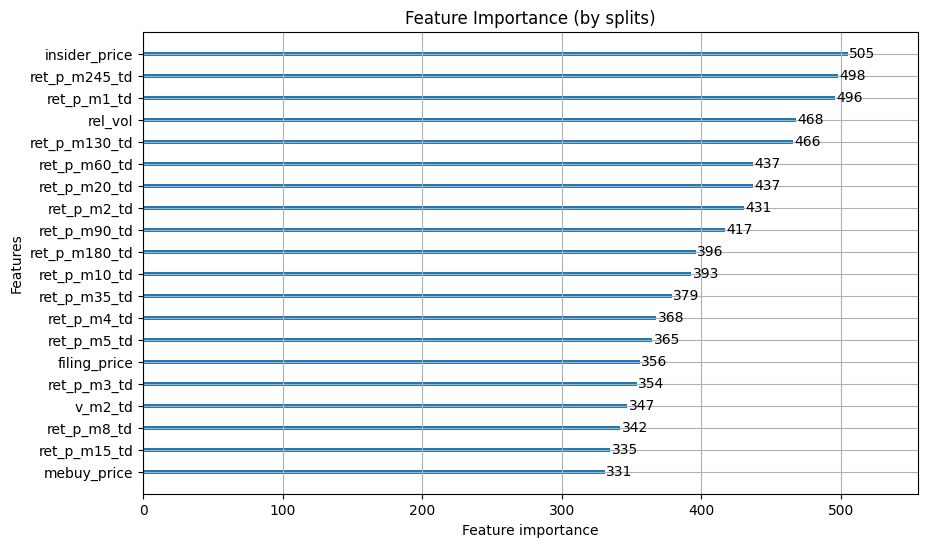

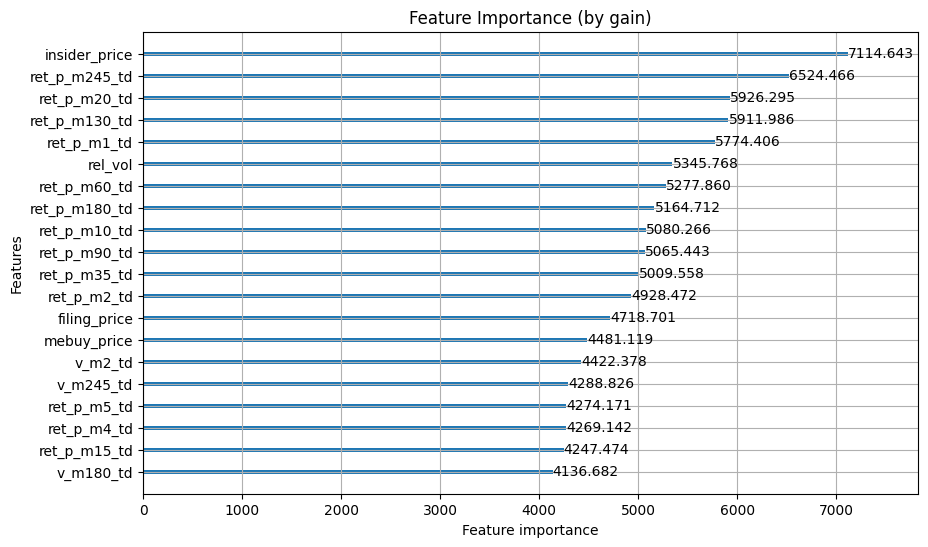

          feature  split_importance  gain_importance
3   insider_price               505      7114.642762
27  ret_p_m245_td               498      6524.465646
21   ret_p_m20_td               437      5926.294567
25  ret_p_m130_td               466      5911.986166
10    ret_p_m1_td               496      5774.406241
9         rel_vol               468      5345.768293
23   ret_p_m60_td               437      5277.859603
26  ret_p_m180_td               396      5164.712000
19   ret_p_m10_td               393      5080.266190
24   ret_p_m90_td               417      5065.443190
22   ret_p_m35_td               379      5009.557521
11    ret_p_m2_td               431      4928.472203
6    filing_price               356      4718.700617
7     mebuy_price               331      4481.119207
29        v_m2_td               347      4422.377909
45      v_m245_td               319      4288.825602
14    ret_p_m5_td               365      4274.171306
13    ret_p_m4_td               368      4269.

In [28]:
import matplotlib.pyplot as plt

# Importance by split count
lgb.plot_importance(gbm, importance_type='split', max_num_features=20, figsize=(10,6))
plt.title("Feature Importance (by splits)")
plt.show()

# Importance by gain (more informative for your case)
lgb.plot_importance(gbm, importance_type='gain', max_num_features=20, figsize=(10,6))
plt.title("Feature Importance (by gain)")
plt.show()

# Or get raw values
importance_df = pd.DataFrame({
    'feature': gbm.feature_name(),
    'split_importance': gbm.feature_importance(importance_type='split'),
    'gain_importance': gbm.feature_importance(importance_type='gain')
}).sort_values('gain_importance', ascending=False)

print(importance_df.head(40))


In [60]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, TimeSeriesSplit

# --- Load data ---
CSV_IN = "oip_mega_wreturns.csv"
model_df = pd.read_csv(CSV_IN)

# --- Parameters ---
days_ahead = 5
target_col = f"ret_p_p{days_ahead}_td"
numeric_target_col = f"{target_col}_orig"

# Keep original numeric returns
model_df[numeric_target_col] = model_df[target_col]

# Binary target
model_df[target_col] = (model_df[target_col] > 0).astype(int)

# --- Feature engineering ---
df = model_df.copy()

# Rolling volatility (past return cols)
for col in [c for c in df.columns if c.startswith("ret_p_m") and "_td" in c]:
    roll_std = df[col].rolling(window=20, min_periods=5).std()
    df[f"{col}_vol20"] = roll_std
    df[f"{col}_adj"] = df[col] / (roll_std + 1e-9)

# Relative volume
past_vol_cols = [c for c in df.columns if c.startswith("v_m") and "_td" in c]
if past_vol_cols:
    df["avg_vol_20"] = df[past_vol_cols[:20]].mean(axis=1)
    df["rel_vol"] = df["v_m1_td"] / (df["avg_vol_20"] + 1e-6)
else:
    df["rel_vol"] = np.nan

# Momentum × Relative Volume
for col in [c for c in df.columns if c.startswith("ret_p_m") and "_td" in c]:
    df[f"{col}_x_relvol"] = df[col] * df["rel_vol"]

# Breakout flags
price_cols = [c for c in df.columns if c.startswith("p_m") and "_td" in c]
for col in price_cols:
    roll_max = df[col].rolling(window=20, min_periods=5).max()
    roll_min = df[col].rolling(window=20, min_periods=5).min()
    df[f"{col}_breakout"] = np.where(df[col] > roll_max.shift(1), 1,
                              np.where(df[col] < roll_min.shift(1), -1, 0))

import re

# --- Final feature list (STRICT FILTER) ---
exclude_patterns = [
    target_col,
    numeric_target_col,
    r"^p_p\d+_td$",           # future price change
    r"^ret_p_p\d+_td$",       # future return
    r"^v_p\d+_td$",           # future volume change
    #r"^ret_p_m\d+_td$",       # past return (optional, remove if you want to keep)
    #r"^p_m\d+_td$",           # past price change (optional, remove if you want to keep)
    #r"^v_m\d+_td$",           # past volume change (optional, remove if you want to keep)
]

def keep_feature(f):
    # Exclude if matches any regex pattern
    for pat in exclude_patterns:
        if re.search(pat, f):
            return False
    return f not in [
        "filing_date", "trade_date", "ticker", "company_name",
        "insider_name", "title", "trade_type", "mebuydate"
    ]

features = [f for f in df.columns if keep_feature(f)]

# Keep only numeric/bool
df_clean = df.dropna(subset=[target_col] + features)
df_clean = df_clean[[*features, target_col]].select_dtypes(include=[np.number, bool])

# --- Time-series split ---
tscv = TimeSeriesSplit(n_splits=5)
train_idx, test_idx = list(tscv.split(df_clean))[-1]
X_train, X_test = (
    df_clean.iloc[train_idx].drop(columns=[target_col]),
    df_clean.iloc[test_idx].drop(columns=[target_col])
)
y_train, y_test = (
    df_clean.iloc[train_idx][target_col],
    df_clean.iloc[test_idx][target_col]
)

# --- LightGBM ---
model = LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    learning_rate=0.02,
    num_leaves=31,
    n_estimators=2000,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print("Training LightGBM...")
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric="auc", callbacks=[])

# --- Predictions ---
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# --- Feature importance ---
feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)
print("\nTop 20 Features by Importance:")
print(feat_imp.head(20))



C:\Users\John DeForest\AppData\Local\Temp\ipykernel_18276\3198273812.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_breakout"] = np.where(df[col] > roll_max.shift(1), 1,
C:\Users\John DeForest\AppData\Local\Temp\ipykernel_18276\3198273812.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_breakout"] = np.where(df[col] > roll_max.shift(1), 1,
C:\Users\John DeForest\AppData\Local\Temp\ipykernel_18276\3198273812.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

Training LightGBM...

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.66      0.55      5405
           1       0.50      0.31      0.38      5865

    accuracy                           0.48     11270
   macro avg       0.49      0.49      0.47     11270
weighted avg       0.49      0.48      0.46     11270

ROC AUC: 0.4676

Top 20 Features by Importance:
                feature  importance
88   ret_p_m35_td_vol20         726
3         insider_price         724
66    ret_p_m2_td_vol20         684
64    ret_p_m1_td_vol20         669
63        ret_p_m245_td         666
44                 year         661
68    ret_p_m3_td_vol20         653
96  ret_p_m180_td_vol20         653
98  ret_p_m245_td_vol20         648
62        ret_p_m180_td         631
94  ret_p_m130_td_vol20         628
61        ret_p_m130_td         627
90   ret_p_m60_td_vol20         622
39            v_m180_td         608
2                 value         603
59  

C:\Users\John DeForest\AppData\Local\Temp\ipykernel_18276\2984166835.py:17: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


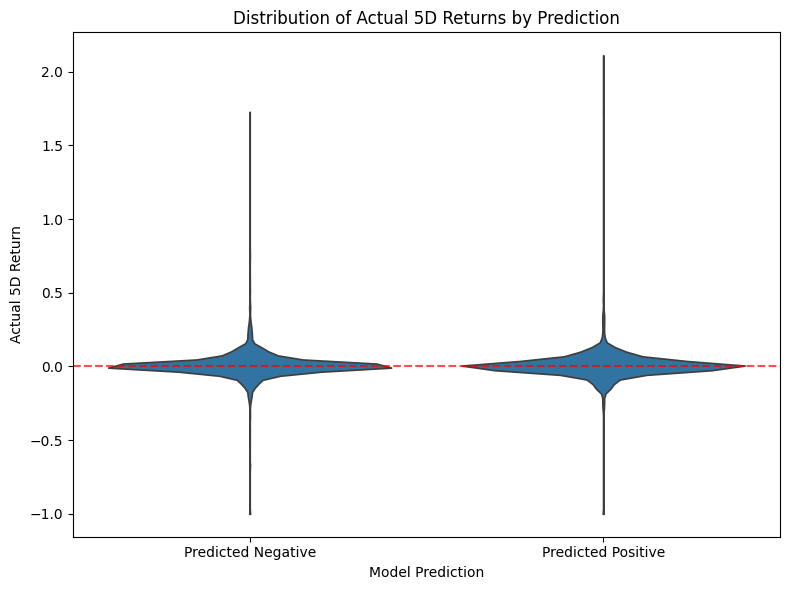

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Combine predictions with actual numeric returns ---
plot_df = df_clean.iloc[test_idx].copy()
plot_df["predicted_positive"] = y_pred
plot_df = df_clean.iloc[test_idx].copy()
plot_df["predicted_positive"] = y_pred

# Pull numeric returns directly from model_df
plot_df["actual_return_5d"] = model_df.iloc[plot_df.index][numeric_target_col]


# --- Plot violin distributions ---
plt.figure(figsize=(8, 6))
sns.violinplot(
    x="predicted_positive",
    y="actual_return_5d",
    data=plot_df,
    inner=None,  # removes the mini-boxplot
    scale="width",  # consistent widths
    cut=0           # don't extend beyond min/max
)
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.xticks([0, 1], ["Predicted Negative", "Predicted Positive"])
plt.title("Distribution of Actual 5D Returns by Prediction")
plt.ylabel("Actual 5D Return")
plt.xlabel("Model Prediction")
plt.tight_layout()
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# --- SHAP Values ---
print("\nCalculating SHAP values...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


Calculating SHAP values...


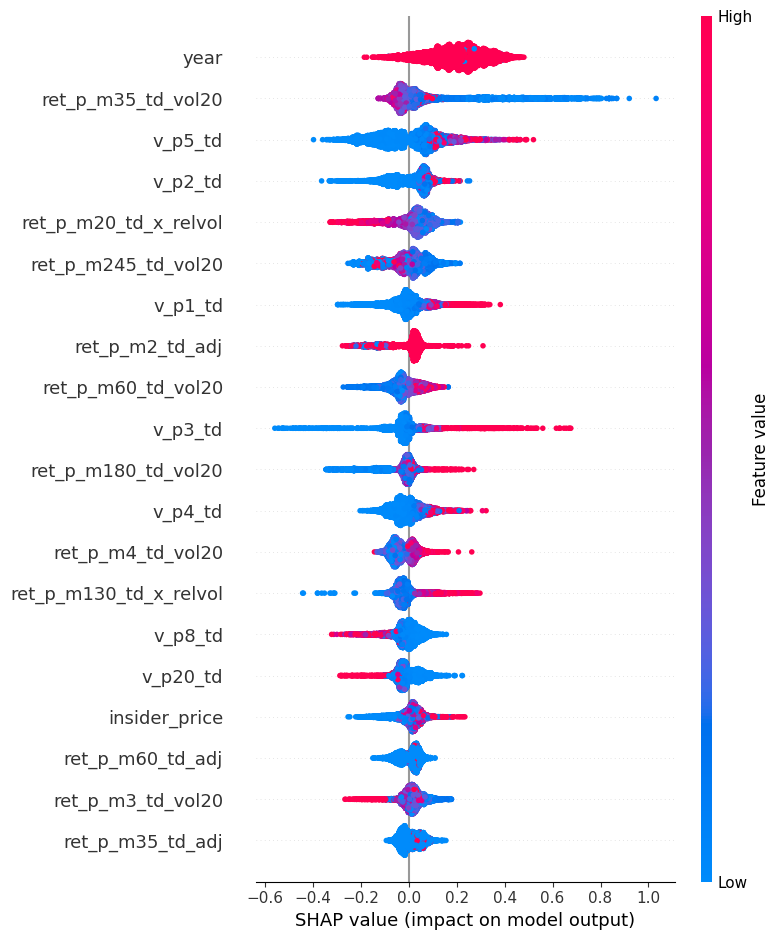

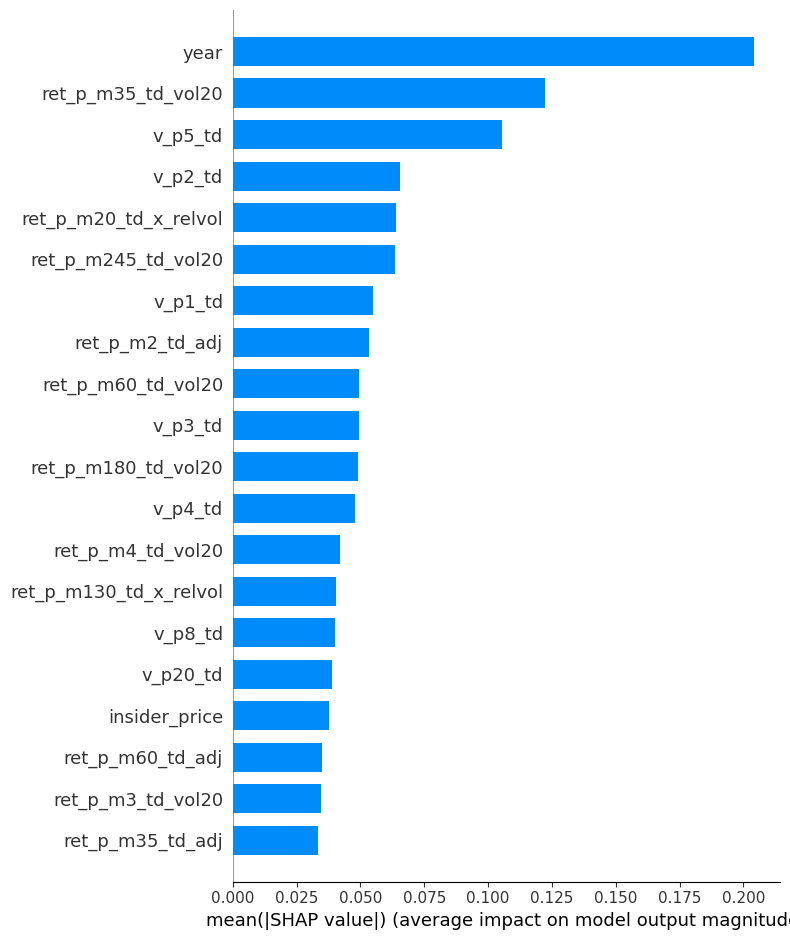

Top 5 features: ['year', 'ret_p_m35_td_vol20', 'v_p5_td', 'v_p2_td', 'ret_p_m20_td_x_relvol']


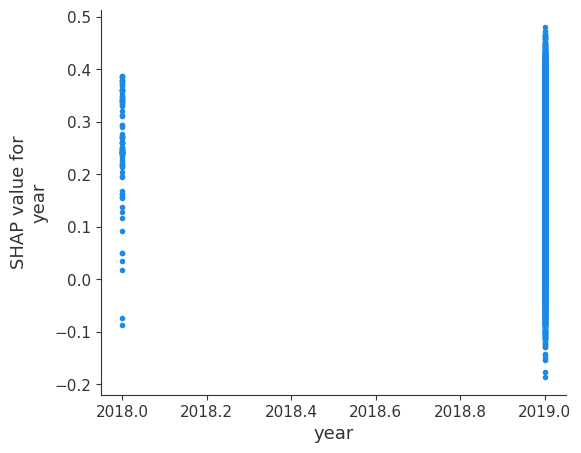

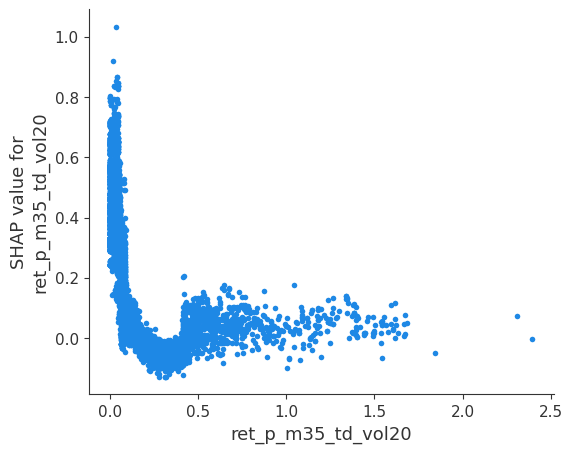

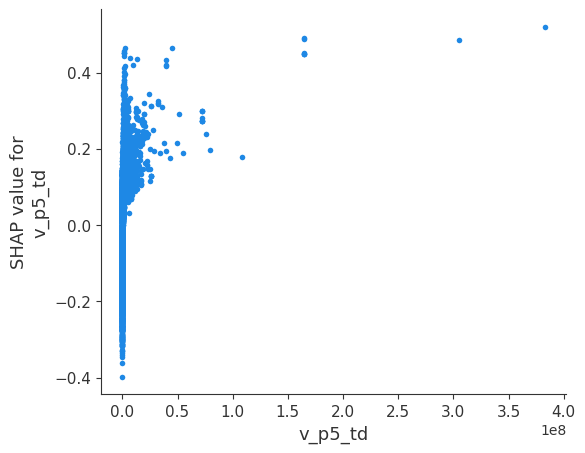

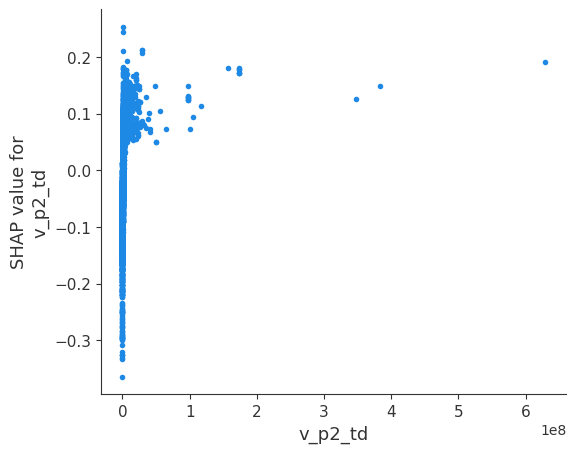

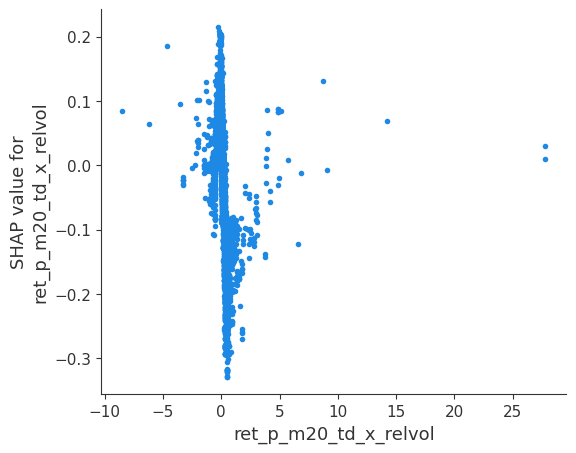

In [ ]:
# If it's a list (multi-class style), pick index 1 for positive class
if isinstance(shap_values, list):
    shap_matrix = shap_values[1]
else:
    shap_matrix = shap_values  # already 2D array (n_samples, n_features)

# Summary plot (top features)
shap.summary_plot(shap_matrix, X_test, max_display=20)

# Bar plot (feature importance by mean abs shap)
shap.summary_plot(shap_matrix, X_test, plot_type="bar", max_display=20)

# Dependence plots for top 5 features
import numpy as np
mean_abs_shap = np.abs(shap_matrix).mean(axis=0)
top5_idx = np.argsort(mean_abs_shap)[-5:][::-1]
top5_features = X_test.columns[top5_idx]
print("Top 5 features:", top5_features.tolist())

for feat in top5_features:
    shap.dependence_plot(feat, shap_matrix, X_test, interaction_index=None)